# Import Library

In [ ]:
# Import pustaka yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Load Dataset

In [ ]:
# Load dataset
df = pd.read_csv('chatgpt_reviews.csv')

# Tampilkan informasi dasar
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507060 entries, 0 to 507059
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              507060 non-null  object
 1   userName              507058 non-null  object
 2   content               507047 non-null  object
 3   score                 507060 non-null  int64 
 4   thumbsUpCount         507060 non-null  int64 
 5   reviewCreatedVersion  466656 non-null  object
 6   at                    507060 non-null  object
 7   appVersion            466656 non-null  object
dtypes: int64(2), object(6)
memory usage: 30.9+ MB


,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,c6789ec9-56c6-4450-95ba-32f7bc3d01b1,Mahammadu bin yussif,good,4,0,1.2025.105,2025-04-21 13:49:49,1.2025.105
1,ca86a338-2e0a-4e00-ae83-959471bf0aa5,Heartfull Vicky1302,excellent app,5,0,1.2025.105,2025-04-21 13:49:28,1.2025.105
2,6ef3e524-2ed8-4860-8e93-1431e8926d8f,opeoluwa olutola,I love this invention,5,0,1.2025.091,2025-04-21 13:49:25,1.2025.091
3,09e6ee79-3bbd-4454-b327-ce4f48e2308f,ʀᴇʏʜᴜɴ,nice💅,5,0,1.2025.098,2025-04-21 13:49:11,1.2025.098
4,ae921850-7cb0-495c-85f1-01a4a1cd38f6,Shakil Ahmed,Good,5,0,1.2025.098,2025-04-21 13:49:09,1.2025.098


# Label Sentimen Berdasarkan Skor

In [ ]:
# Membuat kolom sentimen dari skor
def convert_score_to_sentiment(score):
    if score >= 4:
        return 'positive'
    elif score == 3:
        return 'neutral'
    else:
        return 'negative'

# Terapkan fungsi ke kolom score
df['sentiment'] = df['score'].apply(convert_score_to_sentiment)

# Lihat distribusi sentimen
df['sentiment'].value_counts()

,count
sentiment,
positive,446912
negative,39254
neutral,20894


# Cleaning Data Tabular

In [ ]:
# Cek missing values
print(df.isnull().sum())

# Cek duplikat
print("Jumlah duplikat:", df.duplicated().sum())

# Hapus duplikat (jika ada)
df = df.drop_duplicates()

reviewId                    0
userName                    2
content                    13
score                       0
thumbsUpCount               0
reviewCreatedVersion    40404
at                          0
appVersion              40404
sentiment                   0
dtype: int64
Jumlah duplikat: 2509


# Preprocessing Teks

In [ ]:
# Inisialisasi stopwords dan stemmer
from wordcloud import STOPWORDS # import stopwords from wordcloud

stop_words = STOPWORDS # assign to variable
stemmer = PorterStemmer()

# Fungsi untuk membersihkan teks
def clean_text(text):
    text = str(text).lower()  # lowercase
    text = re.sub(f"[{re.escape(string.punctuation)}0-9]", " ", text)  # hapus angka & tanda baca
    tokens = text.split()  # tokenisasi
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]  # hapus stopwords + stemming
    return ' '.join(tokens)

# Terapkan ke kolom content
df['cleaned_content'] = df['content'].apply(clean_text)

# Tampilkan hasil contoh
df[['content', 'cleaned_content']].head()

,content,cleaned_content
0,good,good
1,excellent app,excel app
2,I love this invention,love invent
3,nice💅,nice💅
4,Good,good


# Visualisasi WordCloud

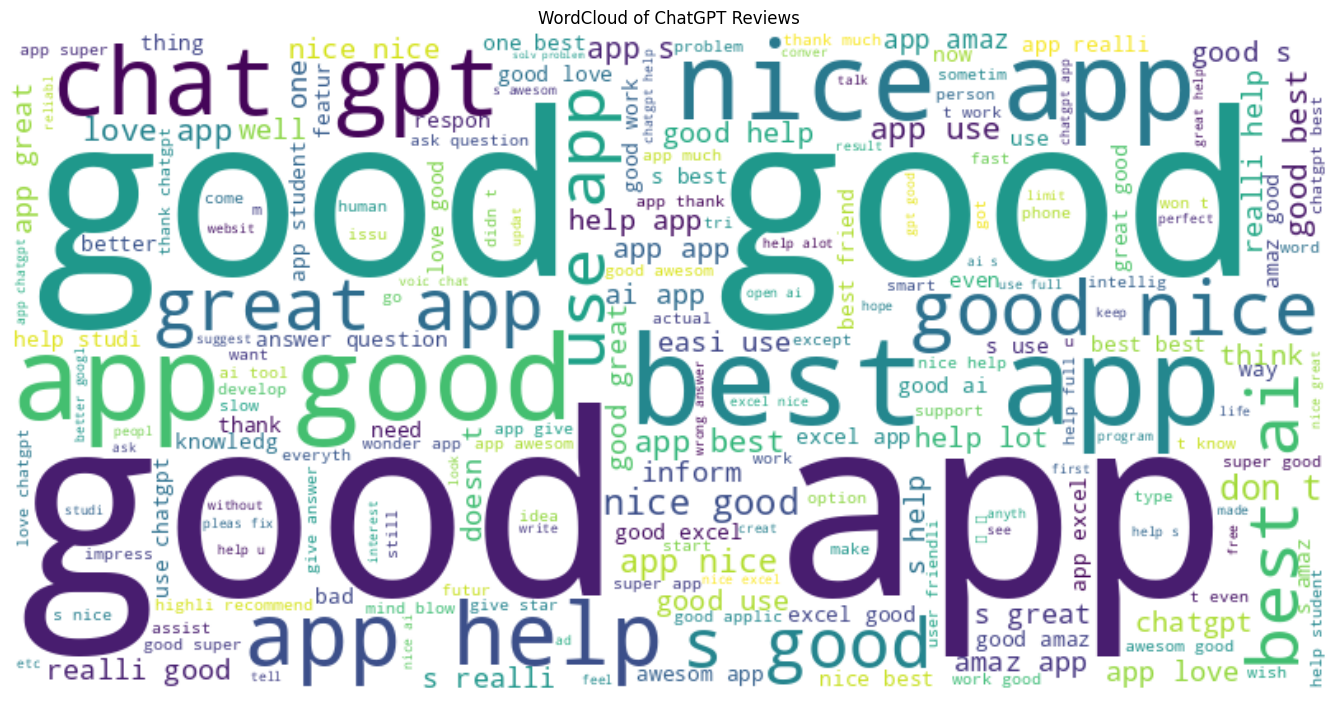

In [ ]:
# Gabungkan semua teks review yang sudah dibersihkan
all_text = ' '.join(df['cleaned_content'])

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Tampilkan WordCloud
plt.figure(figsize=(17, 13))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of ChatGPT Reviews')
plt.show()

# TF-IDF Vectorization
Mengubah teks menjadi representasi numerik menggunakan teknik TF-IDF (Term Frequency - Inverse Document Frequency) agar bisa digunakan oleh algoritma machine learning.

In [ ]:
# Inisialisasi TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=1000)

# Transformasi teks yang sudah dibersihkan
X_tfidf = tfidf.fit_transform(df['cleaned_content'])

# Lihat bentuk hasil vektorisasi
X_tfidf.shape

(504551, 1000)

# Klasifikasi Sentimen dengan Naive Bayes
Memprediksi sentimen (positive/neutral/negative) dari review berdasarkan fitur teks (TF-IDF).

In [ ]:
# Label (target)
y = df['sentiment']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Inisialisasi dan latih model
model = MultinomialNB()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8978505812052204

Classification Report:
               precision    recall  f1-score   support

    negative       0.63      0.38      0.47      7871
     neutral       0.22      0.00      0.00      4259
    positive       0.91      0.99      0.95     88781

    accuracy                           0.90    100911
   macro avg       0.59      0.46      0.48    100911
weighted avg       0.86      0.90      0.87    100911



# Clustering Review dengan KMeans
Mengelompokkan review ke dalam beberapa cluster berdasarkan kemiripan teks, tanpa melihat label sentimen.

In [ ]:
# Inisialisasi KMeans dengan 3 cluster (bisa diubah)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_tfidf)

# Simpan hasil cluster ke dataframe
df['cluster'] = kmeans.labels_

# Lihat distribusi cluster
df['cluster'].value_counts()

,count
cluster,
0,392123
1,75011
2,37417


In [ ]:
for i in range(3):
    print(f"\n--- Distribusi Sentimen di Cluster {i} ---")
    print(df[df['cluster'] == i]['sentiment'].value_counts(normalize=True))


--- Distribusi Sentimen di Cluster 0 ---
sentiment
positive    0.872611
negative    0.087381
neutral     0.040008
Name: proportion, dtype: float64

--- Distribusi Sentimen di Cluster 1 ---
sentiment
positive    0.906614
neutral     0.048700
negative    0.044687
Name: proportion, dtype: float64

--- Distribusi Sentimen di Cluster 2 ---
sentiment
positive    0.921560
negative    0.039902
neutral     0.038539
Name: proportion, dtype: float64


#Visualisasi Clustering dengan PCA
Memvisualisasikan hasil clustering dalam bentuk grafik 2 dimensi, agar bisa melihat seberapa jelas pemisahan antar cluster-nya.

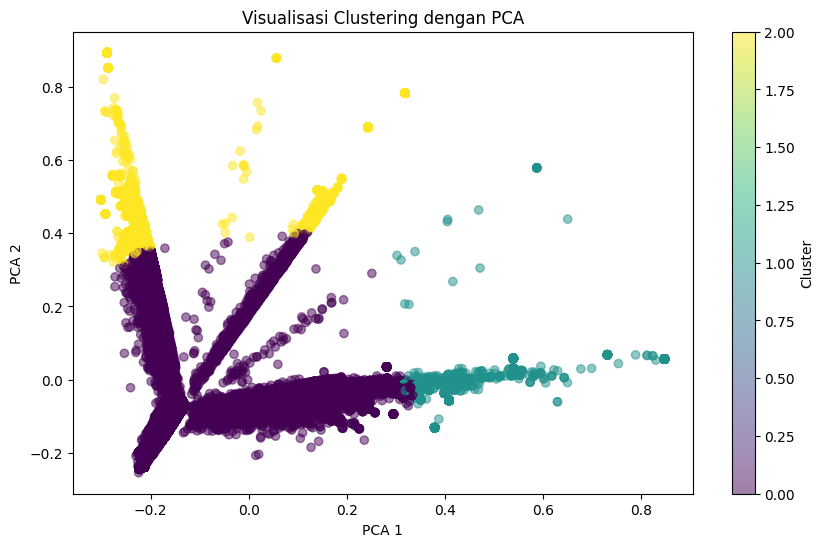

In [ ]:
# Reduksi dimensi ke 2 komponen utama
pca = PCA(n_components=2, random_state=42)
reduced_data = pca.fit_transform(X_tfidf.toarray())

# Tambahkan hasil reduksi ke dataframe
df['pca1'] = reduced_data[:, 0]
df['pca2'] = reduced_data[:, 1]

# Plot visualisasi
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['pca1'], df['pca2'], c=df['cluster'], cmap='viridis', alpha=0.5)
plt.title('Visualisasi Clustering dengan PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(scatter, label='Cluster')
plt.show()

# Analisis Kata Kunci Dominan per Cluster
Mencari kata-kata yang paling sering muncul dan paling merepresentasikan tiap cluster.



In [ ]:
# Loop untuk masing-masing cluster
for i in range(3):
    print(f"\n=== Top TF-IDF Words di Cluster {i} ===")

    # Ambil semua teks dalam 1 cluster dan handle NaN values
    cluster_texts = df[df['cluster'] == i]['content'].dropna()  # Drop NaN values

    # TF-IDF untuk teks di cluster ini saja
    vectorizer = TfidfVectorizer(stop_words='english', max_features=10)
    tfidf_matrix = vectorizer.fit_transform(cluster_texts)

    # Tampilkan top kata
    top_words = vectorizer.get_feature_names_out()
    print(top_words)


=== Top TF-IDF Words di Cluster 0 ===
['ai' 'amazing' 'app' 'best' 'chatgpt' 'good' 'great' 'helpful' 'like'
 'love']

=== Top TF-IDF Words di Cluster 1 ===
['ai' 'app' 'apps' 'good' 'helpful' 'like' 'use' 'useful' 'work' 'working']

=== Top TF-IDF Words di Cluster 2 ===
['aap' 'ai' 'app' 'application' 'apps' 'good' 'helpful' 'like' 'nice'
 'work']
